In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок


stud_math = pd.read_csv('stud_math.csv')
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
# Нам повезло. Нулевых строк нет.
# посмотрим на наш датасет
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [18]:
# установим количество уникальных значений для кадждой колонки. 
# Уникальных значений не так уж и много,повезло.
# выделяется колонка "absences", чуть позже рассмотрим её подробнее.

stud_math.nunique()

school                  2
sex                     2
age                     8
address                 2
famsize                 2
Pstatus                 2
Medu                    5
Fedu                    6
Mjob                    5
Fjob                    5
reason                  4
guardian                3
traveltime              4
studytime               4
failures                4
schoolsup               2
famsup                  2
paid                    2
activities              2
nursery                 2
studytime, granular     4
higher                  2
internet                2
romantic                2
famrel                  6
freetime                5
goout                   5
health                  5
absences               36
score                  18
dtype: int64

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

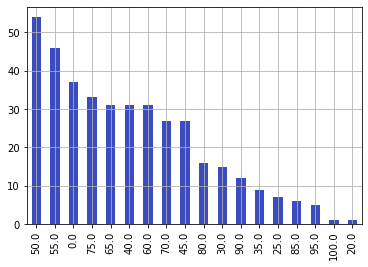

In [28]:
# Посмотрим на распределение признаков по колонке 'score'
stud_math['score'].value_counts(ascending=False).plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm')

stud_math.score.value_counts(ascending=False)

# заметно, что большинство оценок распределено между 2м и 3м квартилями.

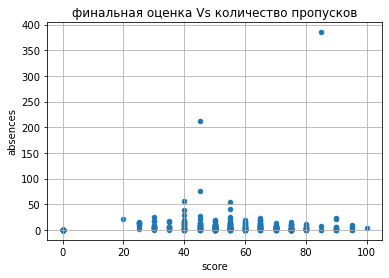

In [13]:
# Теперь выясним есть ли взаимосязь между
# финальной оценкой и количеством пропусков.

stud_math.plot(x = 'score', 
        y = 'absences',
        kind = 'scatter', 
        grid = True, 
        title = 'финальная оценка Vs количество пропусков')


In [5]:
# Я ожидал другой результат, но здесь мы видим явные исключения из правил.
# Явно присудствуют выбросы

In [32]:
# Для наглядности, составим таблицу корреляции поотношению к переменной "score"

math = stud_math.corrwith(stud_math.score)
math.sort_values(ascending=False)
# из полученного результата можно выделить всего 6 признаков с положительной
# корреляцией (Medu, Fedu, studytime, absences, famrel, freetime)


score                  1.000000
Medu                   0.213349
studytime              0.115741
Fedu                   0.078573
absences               0.065283
famrel                 0.057112
freetime               0.019026
health                -0.070460
traveltime            -0.070559
studytime, granular   -0.115741
goout                 -0.129685
age                   -0.155726
failures              -0.344338
dtype: float64

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


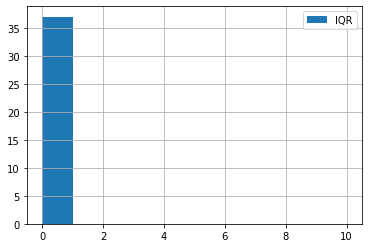

In [10]:
# Для дальнейшего анализа, отфильтруем значения переменной 'score'
# и посмотрим на результат

IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25)
      , '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR)
      , "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math.score.loc[stud_math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();
# Судя по результату, это тметод нам не подходит, оставим все как было

In [71]:
# Напишем функцию для колонок которые имеют по 2 уникальных
# значения и проанализируем их по отношению к 'score'

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (5, 2))
    sns.boxplot(x=column, y='score', data=stud_math)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

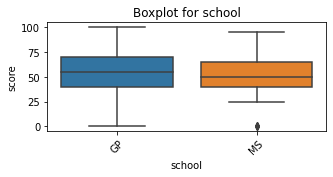

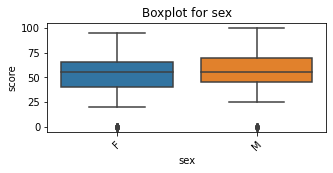

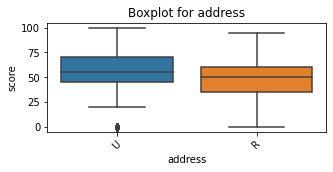

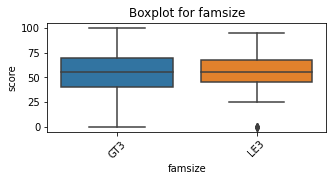

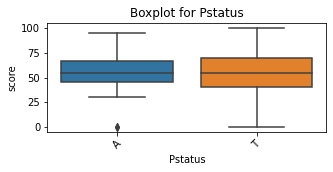

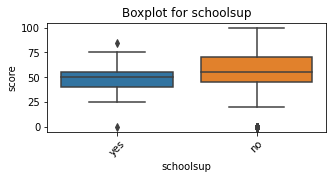

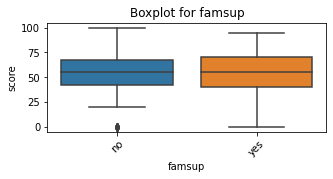

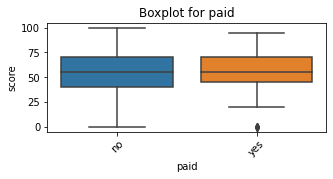

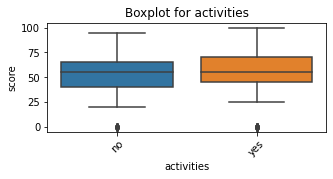

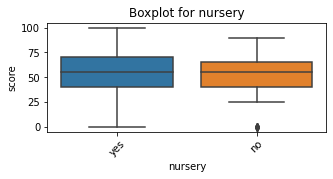

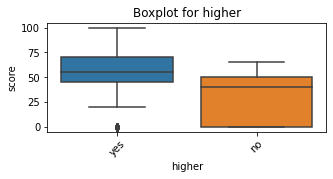

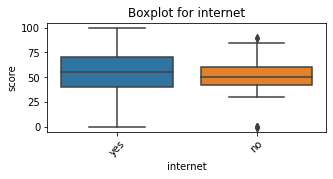

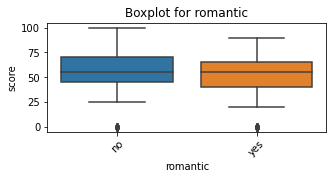

In [72]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup'
            , 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet'
            , 'romantic']:
    get_boxplot(col)

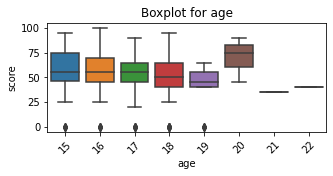

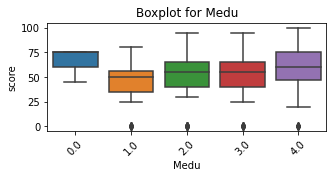

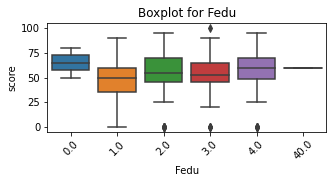

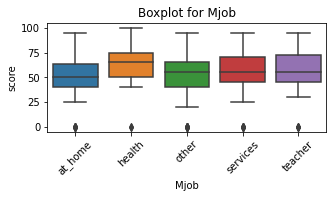

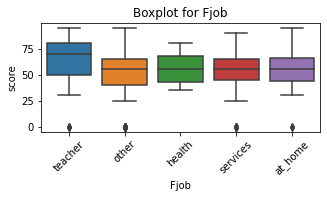

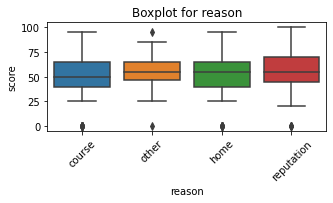

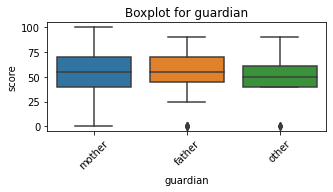

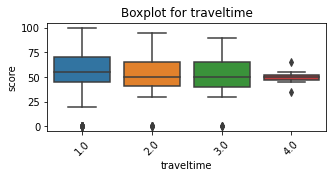

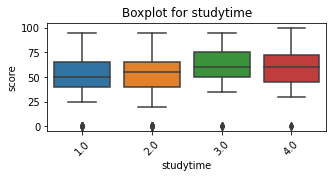

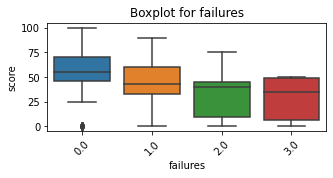

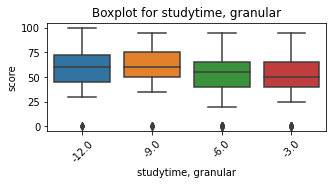

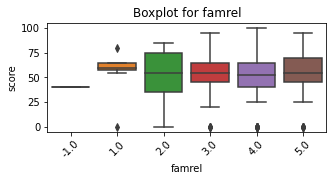

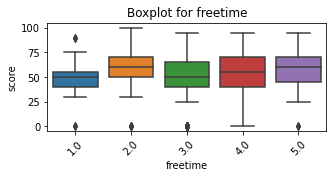

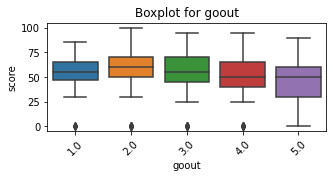

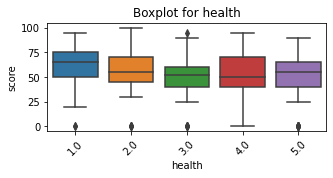

In [73]:
# здесь можно выделить несколько значений наиболее влияющих на езультат
# 'school', 'sex', 'address', 'schoolsup', 'higher', 'internet', 'romantic'

# Теперь построим графики для колонок, которые имет более 2 уникальных значений

for col in ['age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian'
            , 'traveltime', 'studytime', 'failures', 'studytime, granular'
            , 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

In [ ]:
# Здесь похоже все переменные могут вилиять на результат


In [8]:
# Теперь проверим данне с омощью теста Стьюдента

def get_stat_dif(column):
    cols = stud_math.loc[:, column]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
        else:
            print('Статистически значимые различия для колонки не найдены')
        break

In [9]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup'
            , 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet'
            , 'romantic', 'age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian'
            , 'traveltime', 'studytime', 'failures', 'studytime, granular'
            , 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистически значимые различия для колонки не найдены
Статистиче

In [ ]:
# Тест Стьюдента не дал нам никаких результатов, значит будем строить модель\
# только на основании наших графиков

In [18]:
model_math = stud_math.loc[:,['school', 'sex', 'address', 'famsize', 'schoolsup'
                              , 'reason', 'traveltime', 'studytime', 'failures'
                              , 'famrel', 'freetime', 'goout', 'health'
                              , 'school', 'sex', 'address', 'schoolsup'
                              , 'higher', 'romantic', 'absences', 'score']]

In [19]:
model_math

,school,sex,address,famsize,schoolsup,reason,traveltime,studytime,failures,famrel,freetime,goout,health,school,sex,address,schoolsup,higher,romantic,absences,score
0,GP,F,U,NaN,yes,course,2.0,2.0,0.0,4.0,3.0,4.0,3.0,GP,F,U,yes,yes,no,6.0,30.0
1,GP,F,U,GT3,no,course,1.0,2.0,0.0,5.0,3.0,3.0,3.0,GP,F,U,no,yes,no,4.0,30.0
2,GP,F,U,LE3,yes,other,1.0,2.0,3.0,4.0,3.0,2.0,3.0,GP,F,U,yes,yes,NaN,10.0,50.0
3,GP,F,U,GT3,no,home,1.0,3.0,0.0,3.0,2.0,2.0,5.0,GP,F,U,no,yes,yes,2.0,75.0
4,GP,F,U,GT3,no,home,1.0,2.0,0.0,4.0,3.0,2.0,5.0,GP,F,U,no,yes,no,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,no,course,1.0,2.0,2.0,5.0,5.0,4.0,4.0,MS,M,U,no,yes,no,212.0,45.0
391,MS,M,U,LE3,no,course,2.0,1.0,0.0,2.0,4.0,5.0,2.0,MS,M,U,no,yes,no,3.0,80.0
392,MS,M,R,GT3,NaN,course,1.0,1.0,3.0,5.0,5.0,3.0,3.0,MS,M,R,NaN,NaN,no,3.0,35.0
393,MS,M,R,LE3,no,course,3.0,1.0,0.0,4.0,4.0,1.0,5.0,MS,M,R,no,yes,no,0.0,50.0


In [ ]:
В результате EDA для анализа влияния различных факторов на итоговый тест по 
математике студентов были получены следующие выводы:
    В данных есть пропуски и есть выбросы в столбце 'absences' 
    
    Есть положительна корреляция параметров (Medu, Fedu, studytime, absences,
    famrel, freetime) по отношению к 'score', но она не значительна
    
    Самые важные параметры, которые предлагается использовать в дальнейшем для
    построения модели, это 'school', 'sex', 'address', 'famsize', 'schoolsup'
    , 'reason', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime'
    , 'goout', 'health', 'school', 'sex', 'address', 'schoolsup', 'higher'
    , 'romantic', 'absences', 'score'.